# GA-20

In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    selected_indiviuals=np.array(selected_indiviuals_list)
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    chromosome_pop=np.array(mutated_pop)
    #print("chromo mutated pop: ", len(chromosome_pop))
    return chromosome_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:14] |******************************************** | (498) 

best chromosome:  [-82   0]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.001
worst score accuracy:  0.0
worst score standard deviation:  0.0


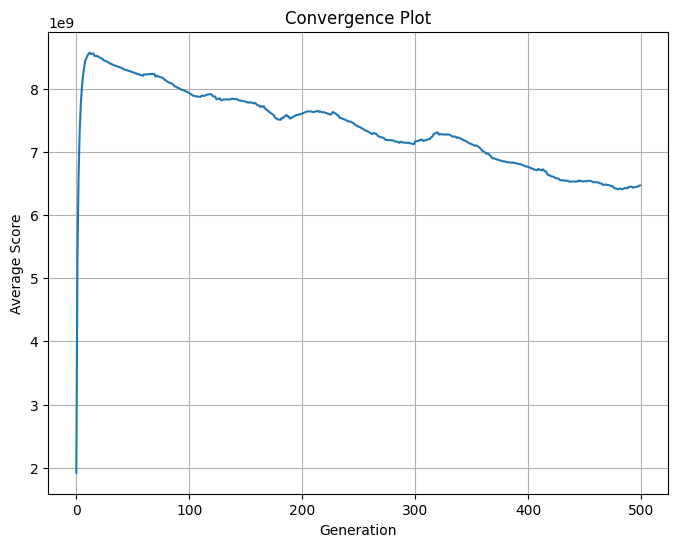

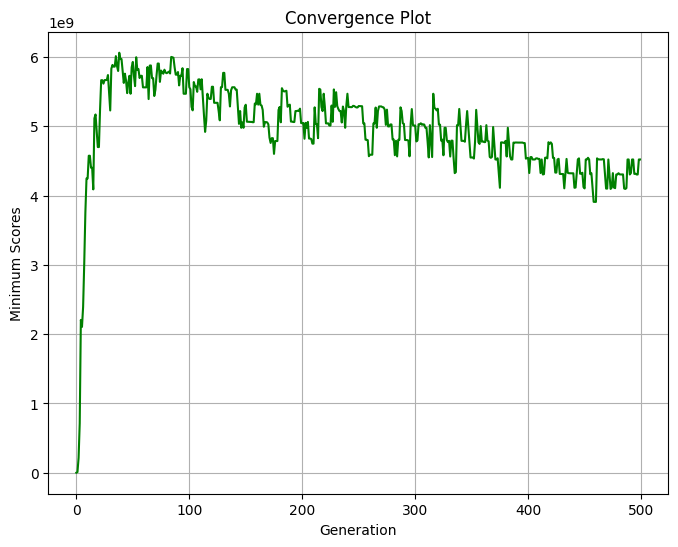

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,2)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-1


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)

    # Check if the difference is smaller than a small threshold
    convergence_threshold = math.exp(-6)
    return delta_fitness < convergence_threshold

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:51] |******************************************** | (498) 

best chromosome:  [-16.90456378  61.84259658]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.066
best score stanard deviation:  0.842
worst score accuracy:  0.0
worst score standard deviation:  0.0


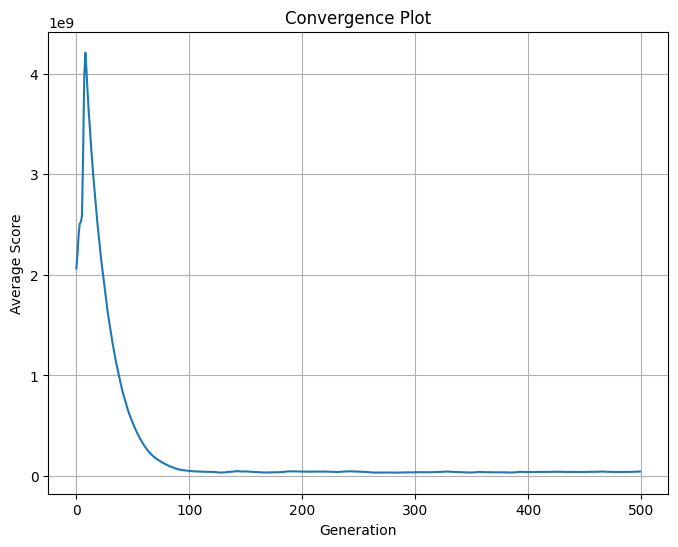

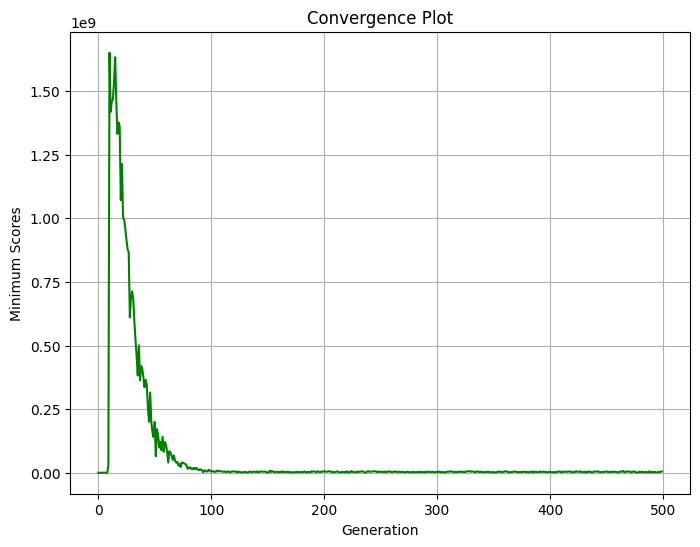

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,10000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-2


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)

    # Check if the difference is smaller than a small threshold
    convergence_threshold = math.exp(-6)
    return delta_fitness < convergence_threshold

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:46] |******************************************** | (498) 

best chromosome:  [-19.40863406  58.19095254]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.01
best score stanard deviation:  0.098
worst score accuracy:  0.0
worst score standard deviation:  0.0


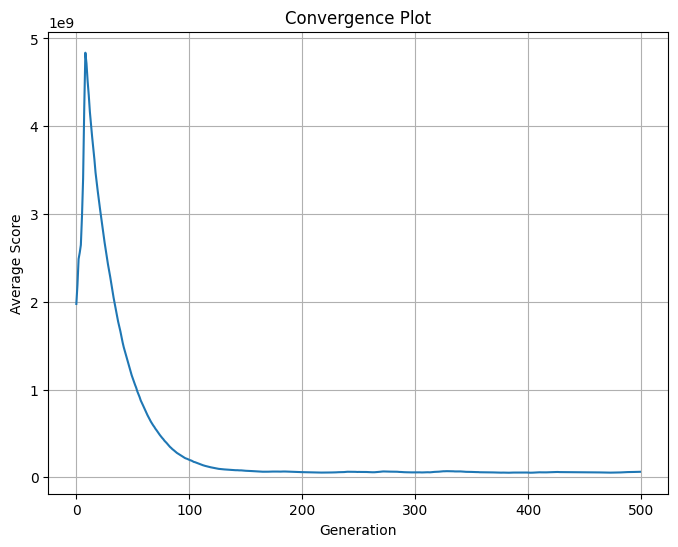

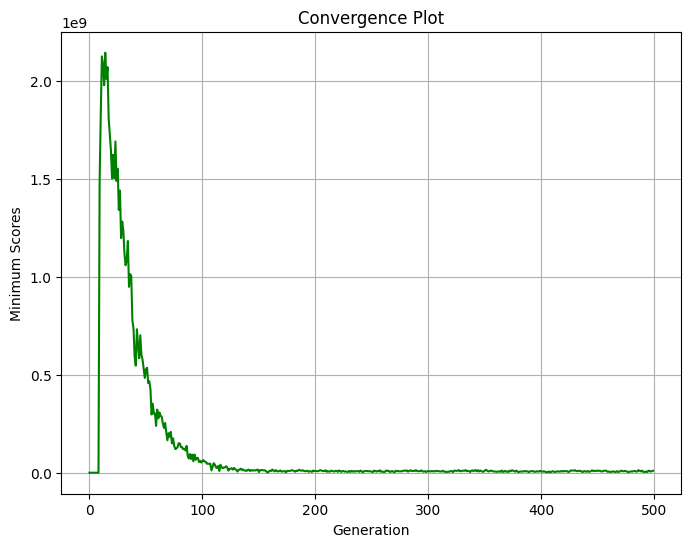

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,10000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-3



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)

    # Check if the difference is smaller than a small threshold
    convergence_threshold = math.exp(-6)
    return delta_fitness < convergence_threshold

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:20] |******************************************** | (499) 

best chromosome:  [99 10]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.001
worst score accuracy:  0.0
worst score standard deviation:  0.0


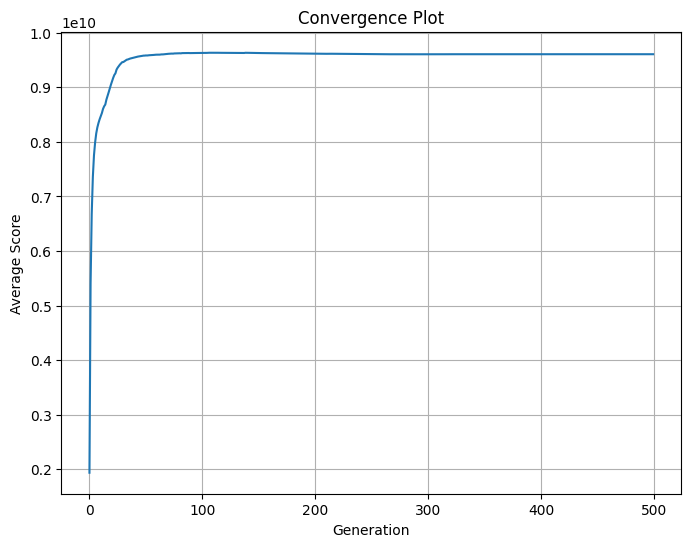

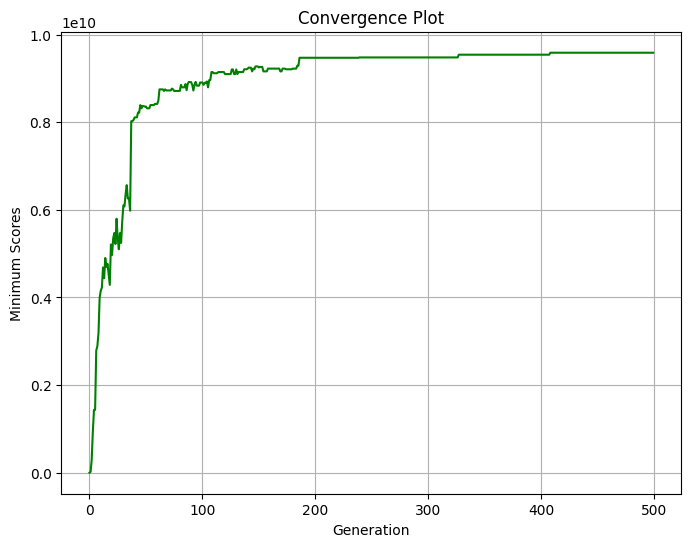

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,10000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-4

In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    selected_indiviuals=np.array(selected_indiviuals_list)
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    chromosome_pop=np.array(mutated_pop)
    #print("chromo mutated pop: ", len(chromosome_pop))
    return chromosome_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:20] |******************************************** | (498) 

best chromosome:  [-79   0]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.0
worst score accuracy:  0.0
worst score standard deviation:  0.0


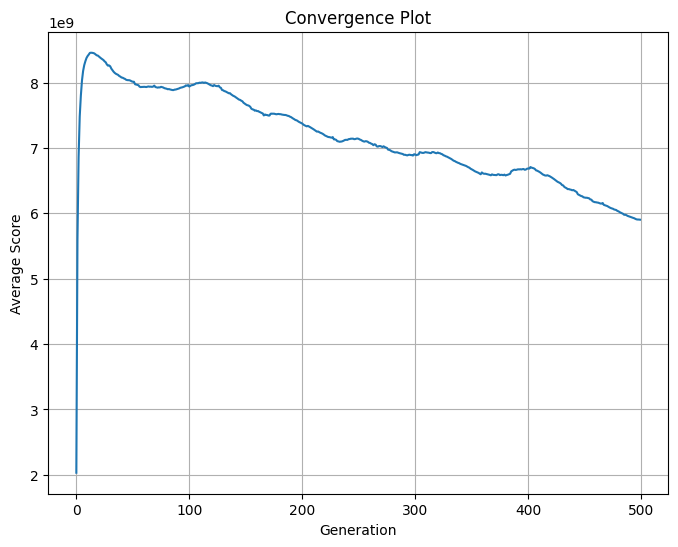

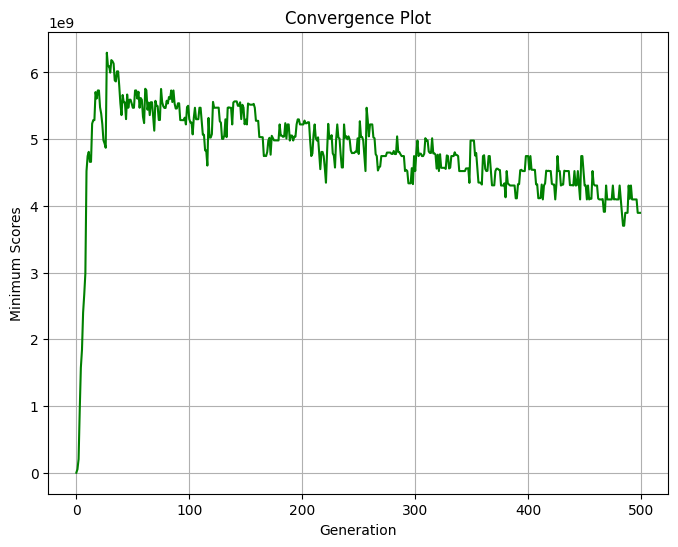

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,10000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-5



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,10000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

 [elapsed time: 0:20:14] |                                               | (5) 

# GA-6



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=1,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)

    # Check if the difference is smaller than a small threshold
    convergence_threshold = math.exp(-6)
    return delta_fitness < convergence_threshold

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,10000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

 [elapsed time: 0:01:55] |                                               | (3) 

KeyboardInterrupt: ignored

# GA-7



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,10000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

 [elapsed time: 0:00:11] |                                               | (1) 

KeyboardInterrupt: ignored

# GA-8



In [60]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [61]:
def initialize(n_feat,sz):
    population=[]
    data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]

    for i in range(len(data)):
        chromosome=data[i]
        chromosome=np.array(chromosome)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    pop=np.array(population)
    np.random.shuffle(pop)
    return list(pop)

In [62]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [63]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [64]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [6]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [65]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [66]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [67]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [68]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:01:44] |******************************************** | (499) 

best chromosome:  [0 0]
average score  accuracy:  0.267
average score standard deviation:  0.155
best score accuracy:  0.327
best score stanard deviation:  0.022
worst score accuracy:  0.252
worst score standard deviation:  0.143


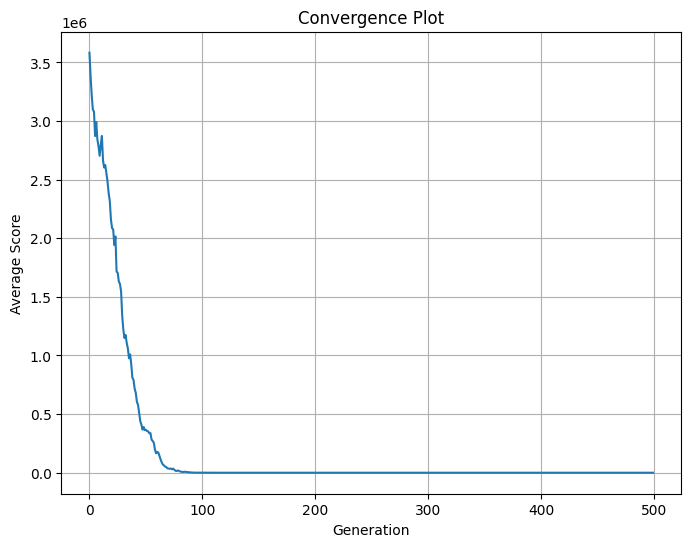

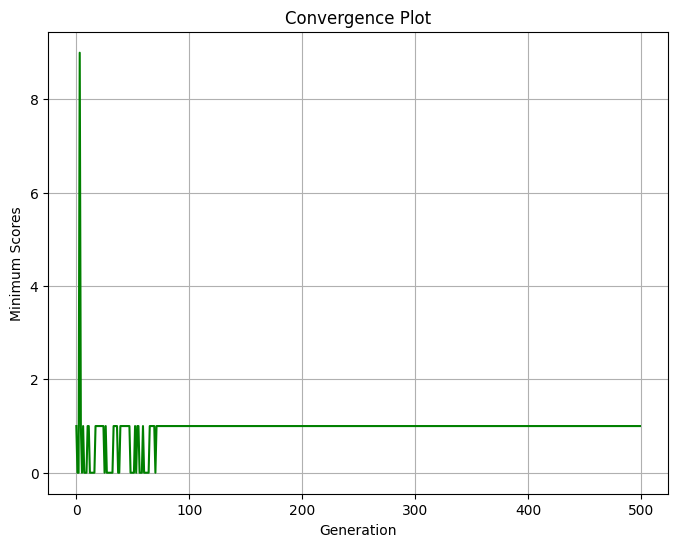

In [70]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,4)
    best_accuracy,bst_std=average_fraction(stats_min,4)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,4)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-9


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:08] |******************************************** | (494) 

best chromosome:  [21.54932857 -2.58763088]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.002
worst score accuracy:  0.0
worst score standard deviation:  0.0


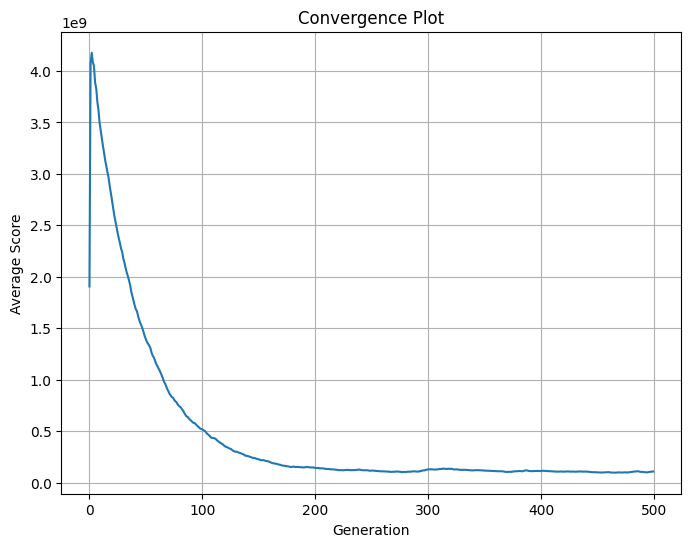

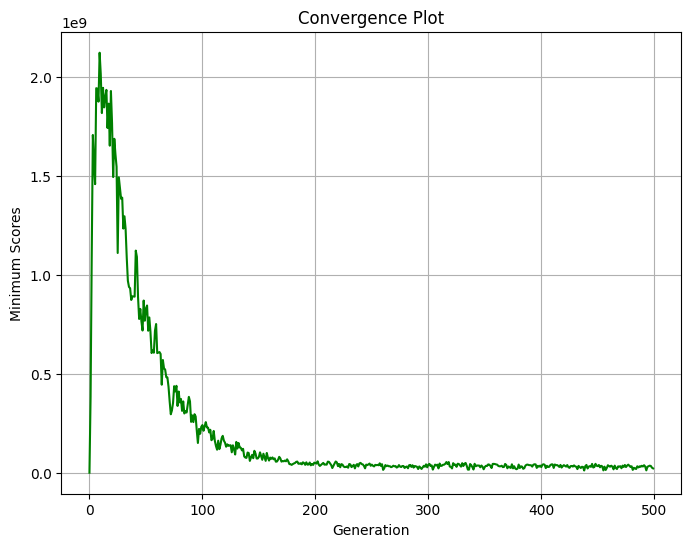

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-10


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:09] |******************************************** | (499) 

best chromosome:  [ 18.02335981 -12.92501171]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.0
worst score accuracy:  0.0
worst score standard deviation:  0.0


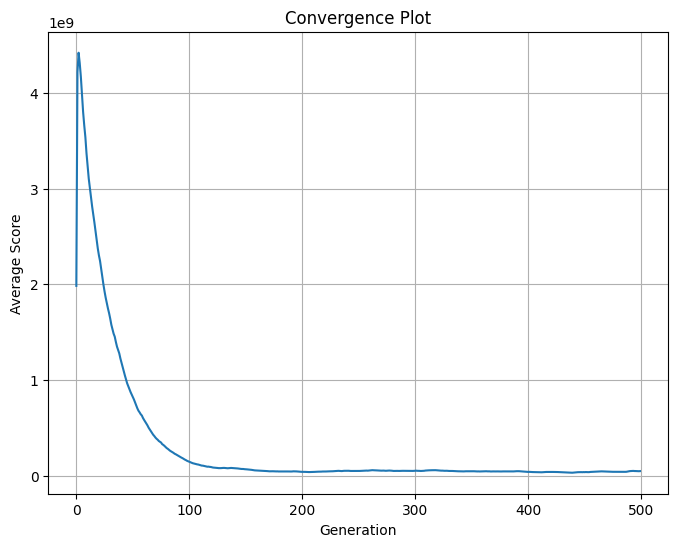

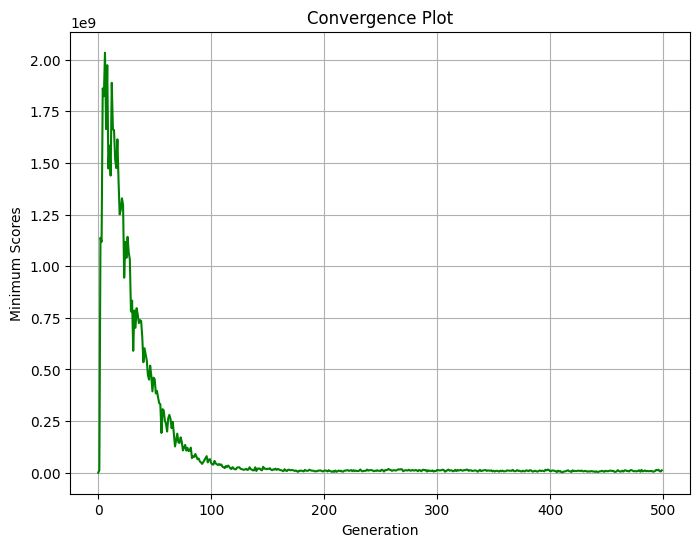

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-11


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)

    # Check if the difference is smaller than a small threshold
    convergence_threshold = math.exp(-6)
    return delta_fitness < convergence_threshold

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:02] |*******************************************  | (488) 

best chromosome:  [256.44789115 110.06446909]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.003
worst score accuracy:  0.0
worst score standard deviation:  0.0


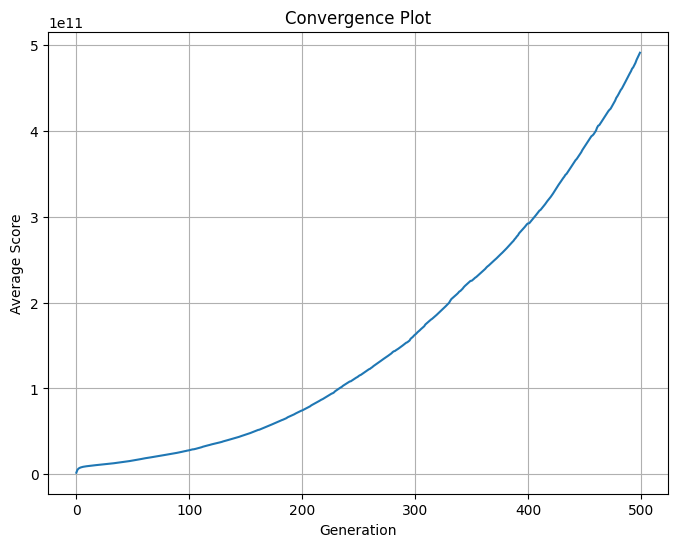

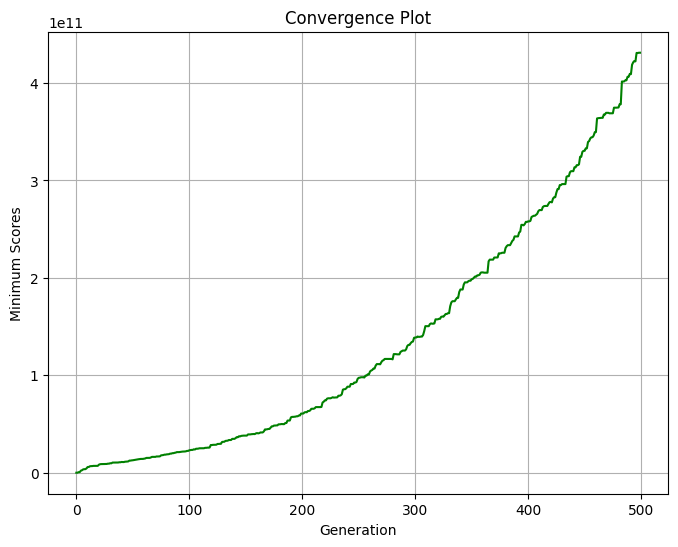

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-12


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)

    # Check if the difference is smaller than a small threshold
    convergence_threshold = math.exp(-6)
    return delta_fitness < convergence_threshold

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:02] |*******************************************  | (488) 

best chromosome:  [115.10771022   6.03406623]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.001
best score stanard deviation:  0.015
worst score accuracy:  0.0
worst score standard deviation:  0.0


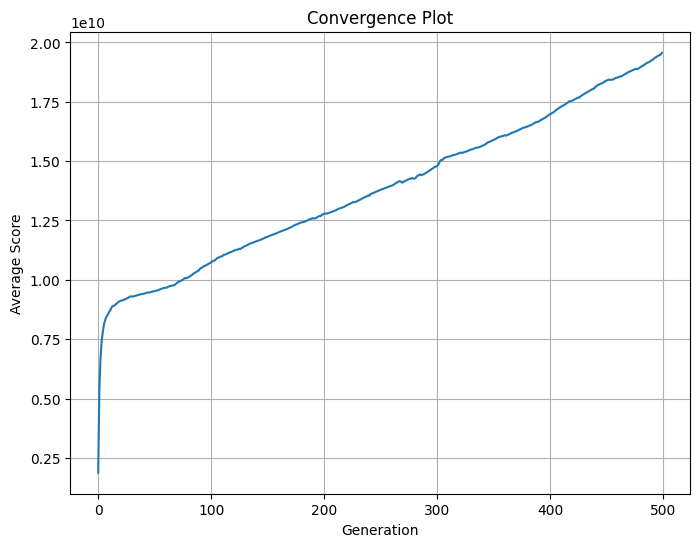

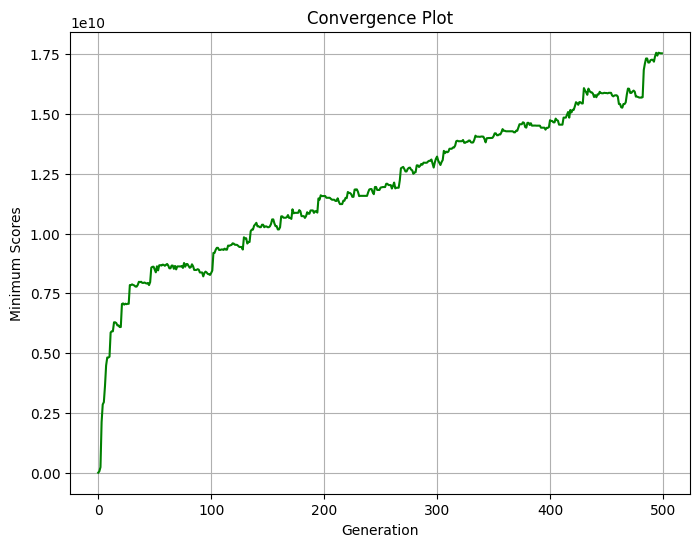

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-13



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:38] |******************************************** | (498) 

best chromosome:  [140.27525638 138.94566745]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.0
worst score accuracy:  0.0
worst score standard deviation:  0.0


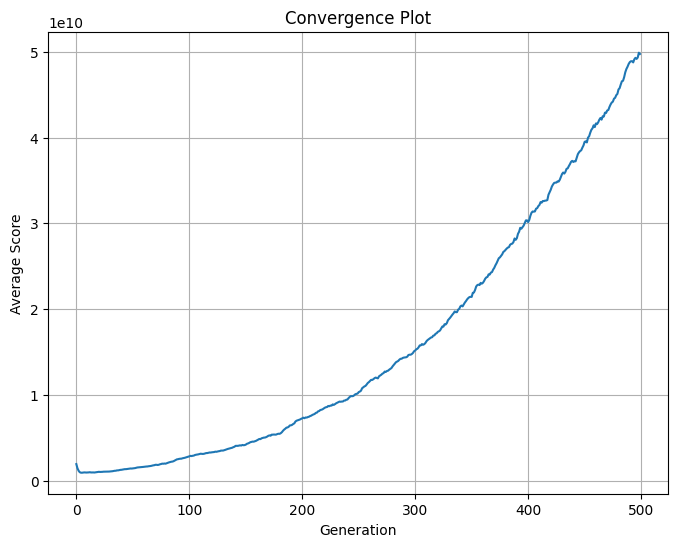

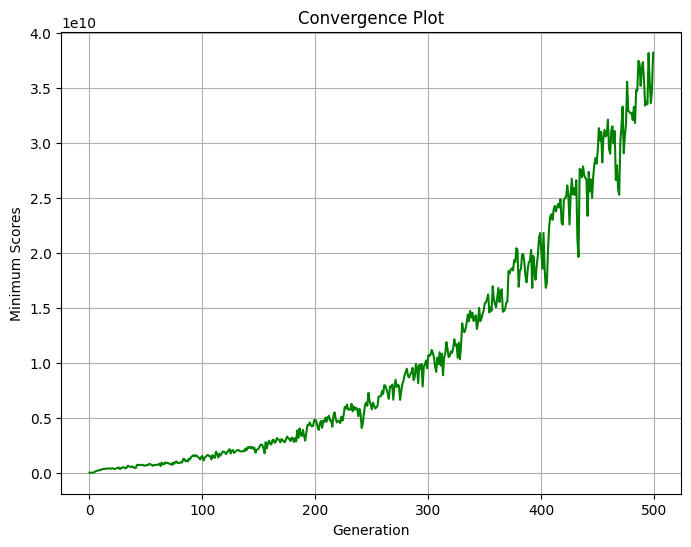

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-14



In [49]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [50]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [51]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [52]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [53]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [54]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [55]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [56]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [57]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [58]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:32] |******************************************** | (498) 

best chromosome:  [1.05646634 1.07567624]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.281
best score stanard deviation:  0.069
worst score accuracy:  0.0
worst score standard deviation:  0.0


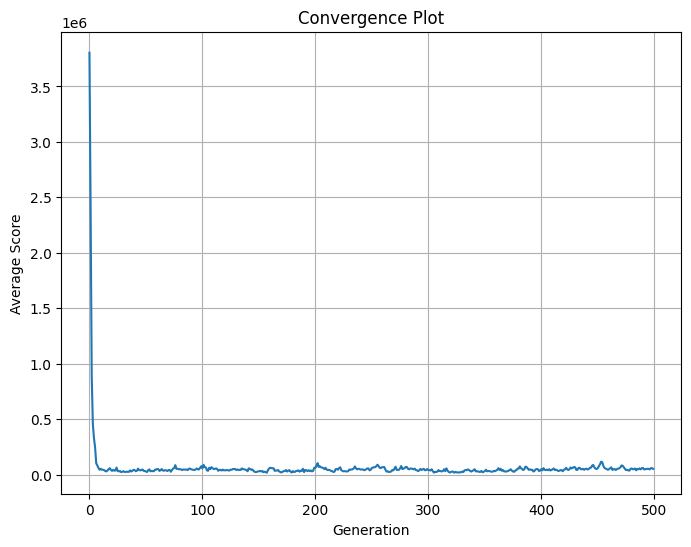

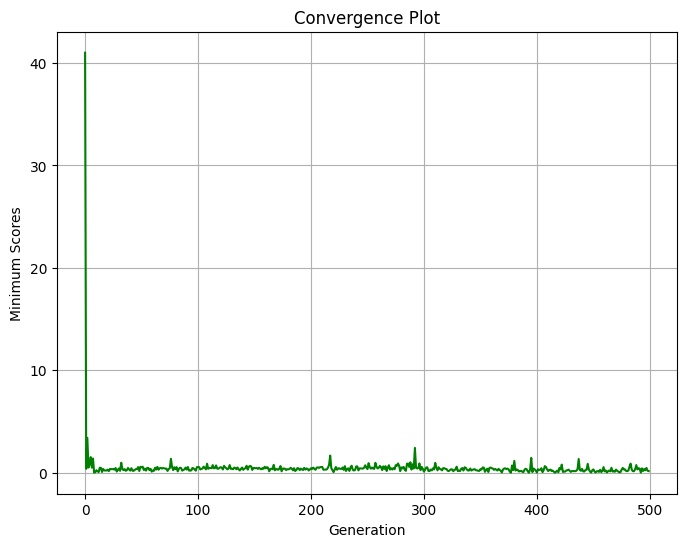

In [59]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,4)
    best_accuracy,bst_std=average_fraction(stats_min,4)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,4)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-15



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)

    # Check if the difference is smaller than a small threshold
    convergence_threshold = math.exp(-6)
    return delta_fitness < convergence_threshold

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:32] |******************************************** | (498) 

best chromosome:  [101.81091556 150.30808381]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.004
best score stanard deviation:  0.042
worst score accuracy:  0.0
worst score standard deviation:  0.0


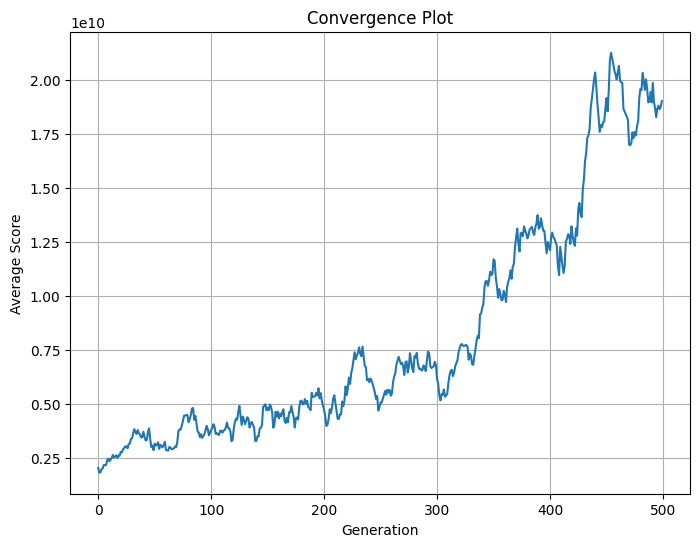

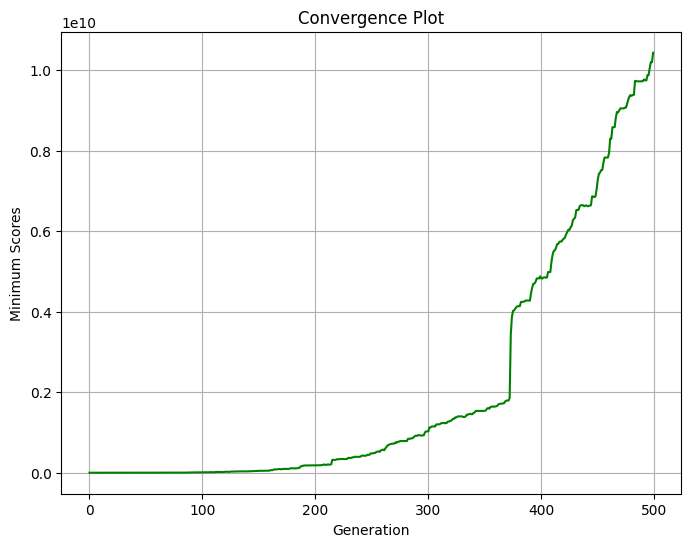

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-16



In [31]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)

    # Check if the difference is smaller than a small threshold
    convergence_threshold = math.exp(-6)
    return delta_fitness < convergence_threshold

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:32] |******************************************** | (498) 

best chromosome:  [-11.02880527  38.85072582]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.002
worst score accuracy:  0.0
worst score standard deviation:  0.0


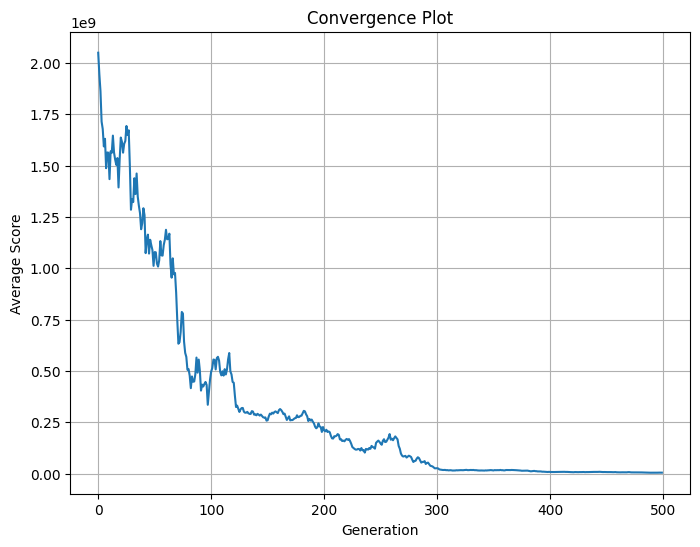

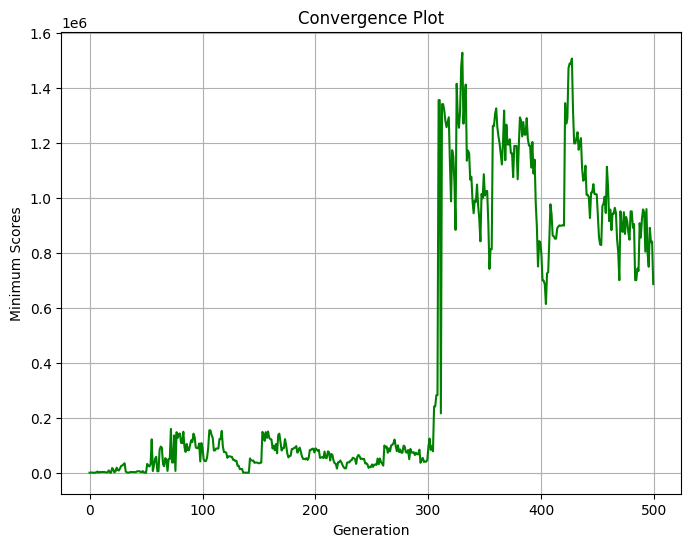

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-18


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:37] |******************************************** | (498) 

best chromosome:  [ 13.32200543 -60.812605  ]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.005
best score stanard deviation:  0.046
worst score accuracy:  0.0
worst score standard deviation:  0.0


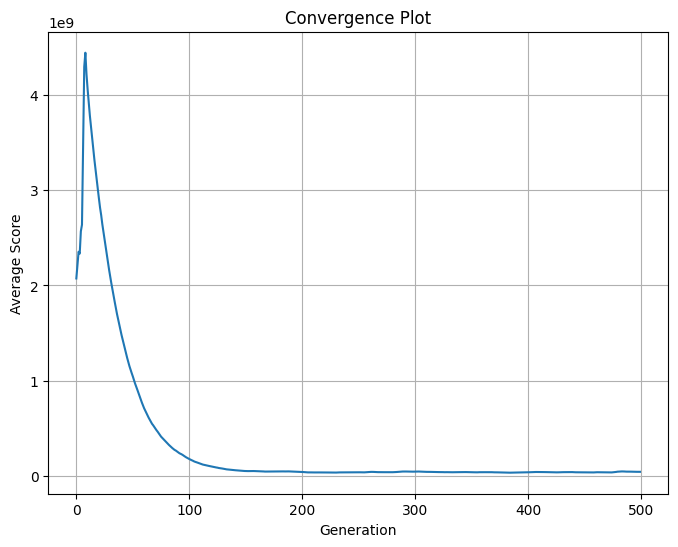

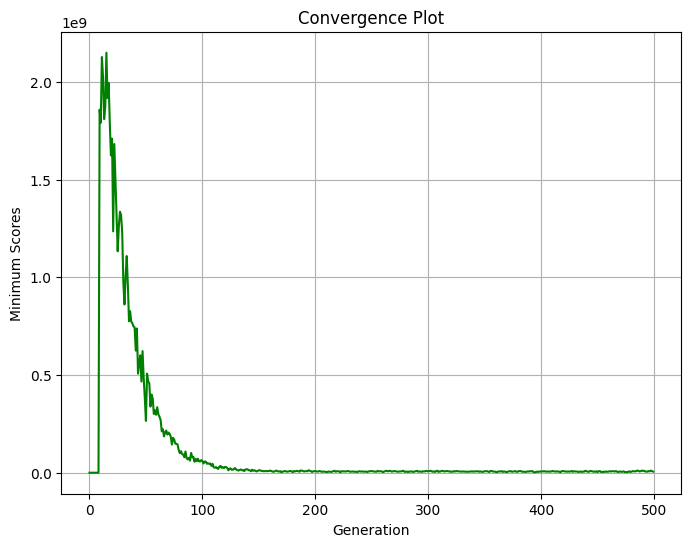

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,2)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-17


In [21]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [22]:
def initialize(sz,n_feat):
    population=[]
    data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]
    for i in range(len(data)):
        chromosome=data[i]
        chromosome=np.array(chromosome)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    pop=np.array(population)
    np.random.shuffle(pop)
    return list(pop)

In [23]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [24]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [25]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [26]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [27]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [28]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        # print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        # print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [29]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:14] |******************************************** | (498) 

best chromosome:  [-13.28888329  -0.07007432]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.01
best score stanard deviation:  0.089
worst score accuracy:  0.0
worst score standard deviation:  0.0


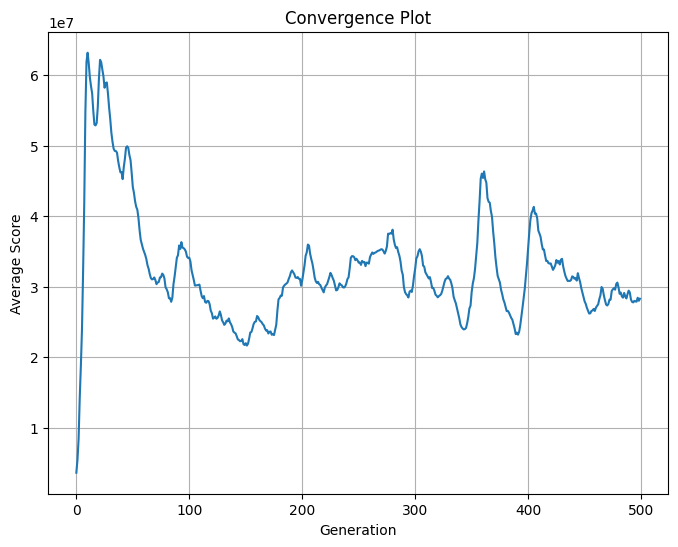

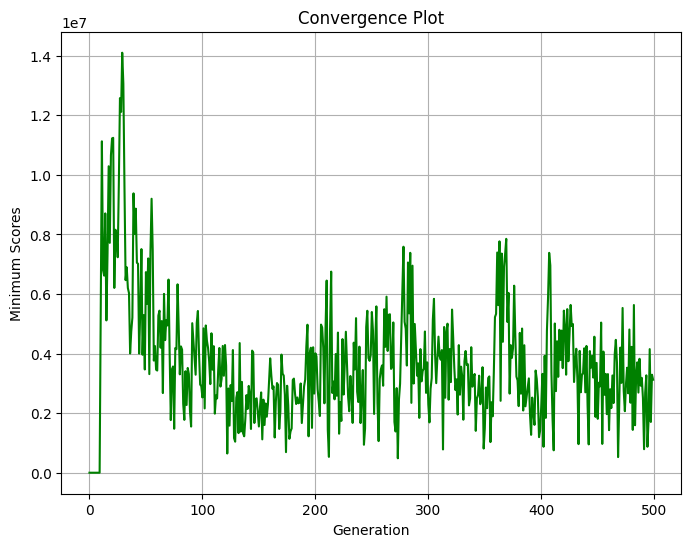

In [30]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,4)
    best_accuracy,bst_std=average_fraction(stats_min,4)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,4)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-19



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:12] |******************************************** | (497) 

best chromosome:  [99  0]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.002
best score stanard deviation:  0.045
worst score accuracy:  0.0
worst score standard deviation:  0.0


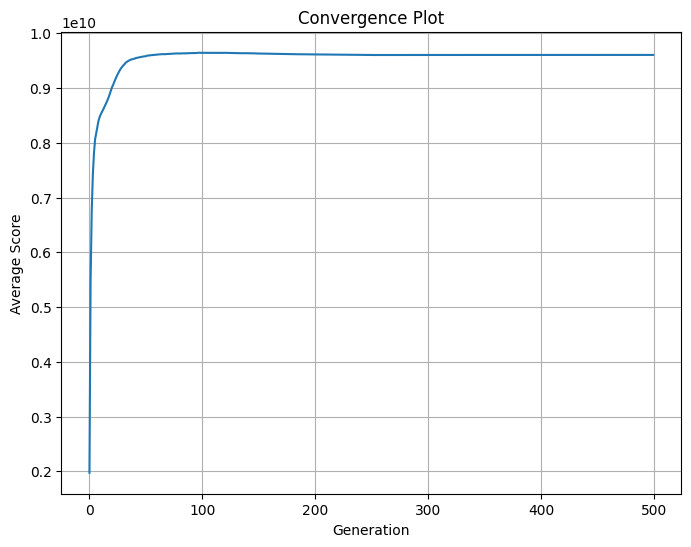

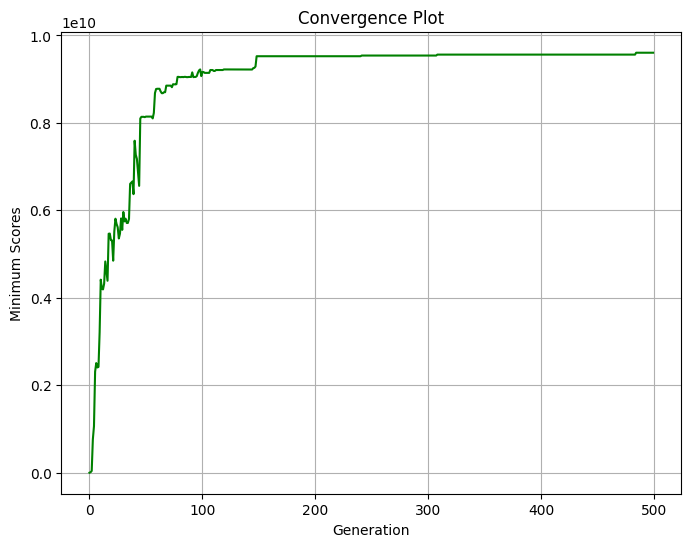

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,2)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-23



In [71]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [72]:
def initialize(sz,n_feat):
    population=[]
    data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]
    for i in range(len(data)):
        chromosome=data[i]
        chromosome=np.array(chromosome)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    pop=np.array(population)
    np.random.shuffle(pop)
    return list(pop)

In [73]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [74]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [76]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [78]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [79]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [80]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [81]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          print("GA converged due to population decline at generation",i+1)
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [82]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:01:43] |******************************************** | (499) 

best chromosome:  [0 0]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.942
best score stanard deviation:  0.16
worst score accuracy:  0.0
worst score standard deviation:  0.0


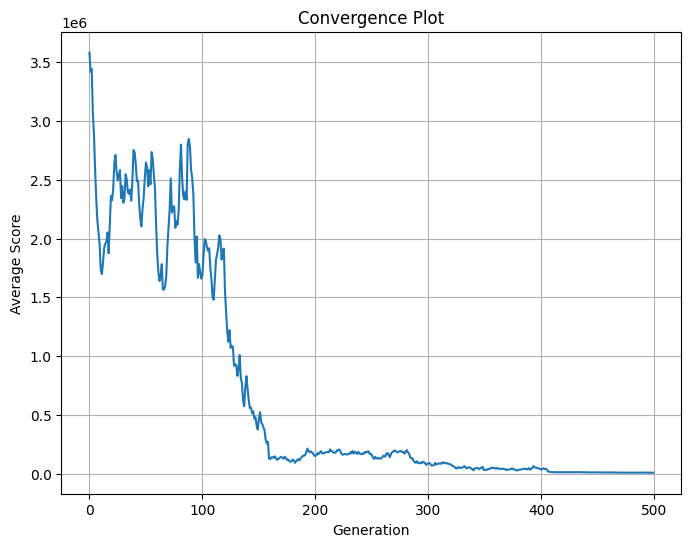

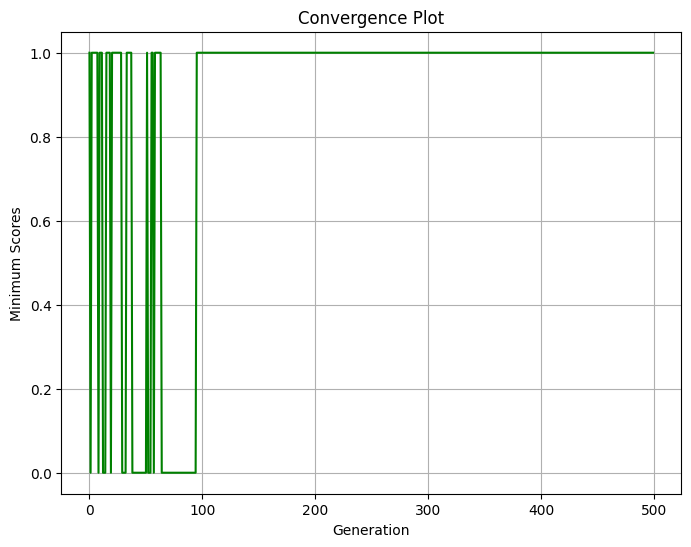

In [83]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,2)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-21



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:13] |******************************************** | (498) 

best chromosome:  [-2116.99693533 -2065.63657236 -2112.11007326 ... -2063.11007326
 -2117.11007326 -2068.11007326]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.0
worst score accuracy:  0.0
worst score standard deviation:  0.0


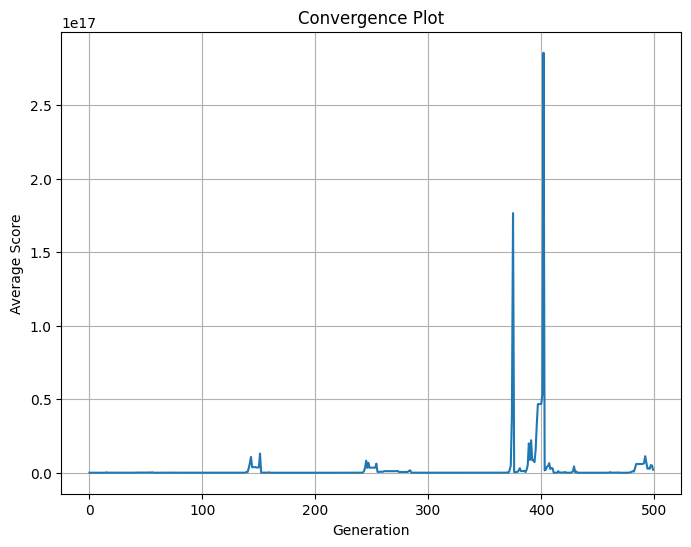

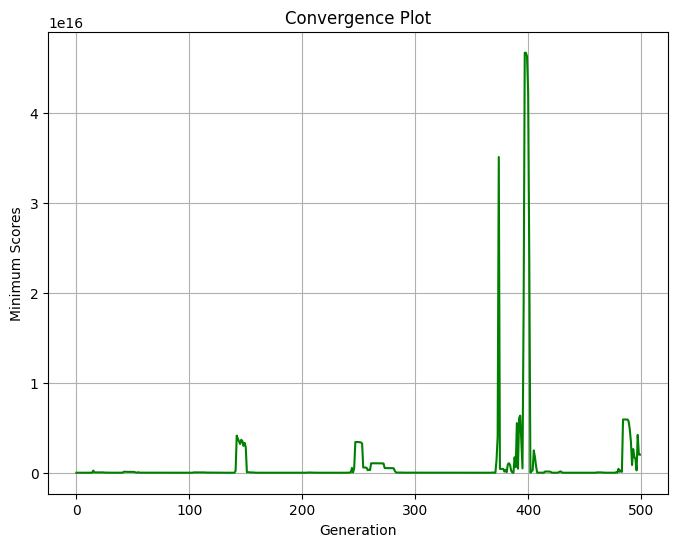

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,2)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-22



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

 [elapsed time: 0:00:12] |******************************************** | (498) 

best chromosome:  [-738.14646127 -777.40164163 -765.29999284 ... -725.29999284 -785.29999284
 -834.29999284]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.0
worst score accuracy:  0.0
worst score standard deviation:  0.0


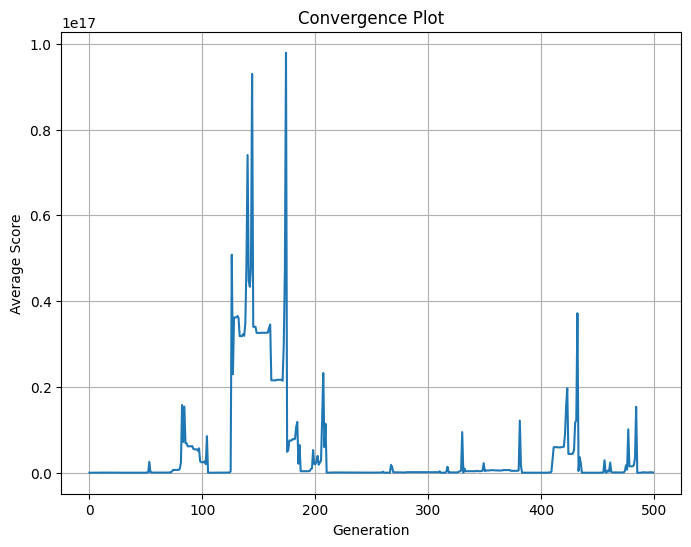

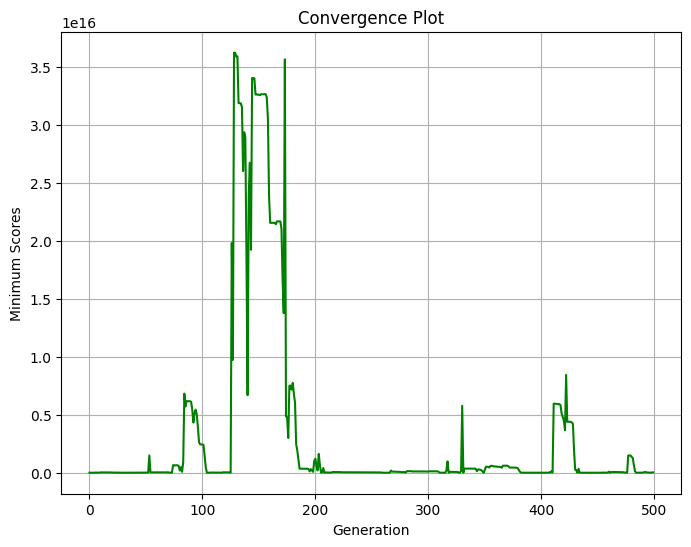

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-24



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          print("GA converged due to population decline at generation",i+1)
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,2)
    best_accuracy,bst_std=average_fraction(stats_min,2)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,2)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

 [elapsed time: 0:04:36] |**************************                   | (293) 

# GA-25


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    for i in range(n_gens):
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged at generation {i}",i)
          break
        #print("!===========!",stats_avg)
        #print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        #print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        #print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        #print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return stats_min,stats_max,stats_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k_means_pp.cluster_centers_ [[29.66666667 33.33333333 20.33333333 54.66666667 89.66666667 89.
  78.66666667 25.         21.33333333 56.33333333 81.66666667 49.33333333
  43.33333333 44.         14.33333333 58.         57.         68.33333333
  28.66666667 41.66666667 58.33333333 84.33333333 60.66666667 59.33333333
  58.66666667 30.66666667 50.         20.         55.         74.
  49.66666667 42.33333333 72.33333333 64.33333333 33.         40.
  66.33333333 41.66666667 41.66666667 94.          8.66666667 43.33333333
  61.33333333 22.66666667 24.         58.         57.66666667 36.
  73.66666667 49.         35.66666667 77.66666667 26.33333333 18.
  53.         66.         55.33333333 58.33333333 39.         59.66666667
  57.         31.33333333 40.66666667 52.         55.66666667 48.33333333
  24.33333333 58.         28.         50.66666667 28.66666667 30.
  57.33333333 66.         76.         55.66666667 43.66666667 48.
  47.33333333 31.33333333 37.33333333 34.66666667 29.33333333 58.3

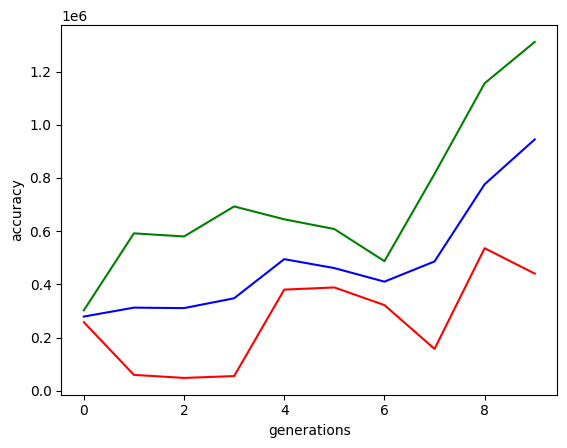

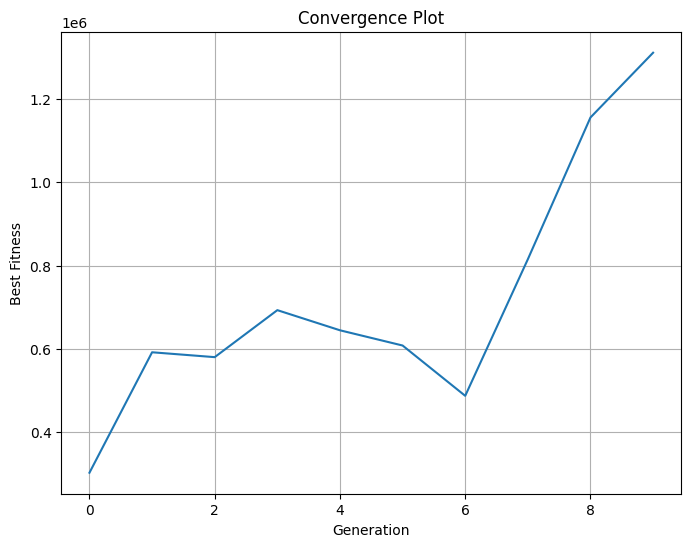

In [ ]:
if __name__ == "__main__":
    n_gen=100
    sz=500
    n_feat=2
    mutation_rate=0.4
    best_score,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    # # plot the statistics
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_gen), stats_min)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()

# GA-26


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    for i in range(n_gens):
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged at generation {i}",i)
          break
        #print("!===========!",stats_avg)
        #print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        #print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        #print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        #print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return stats_min,stats_max,stats_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


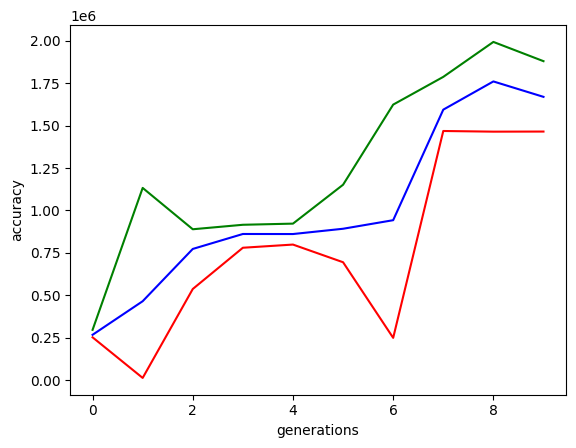

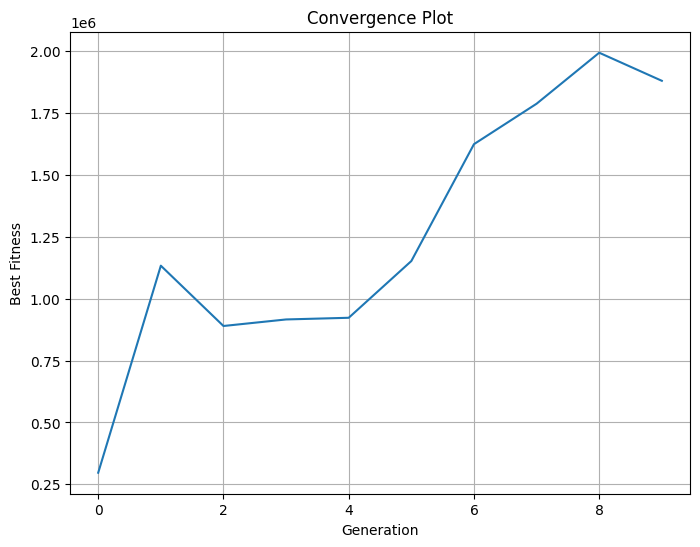

In [ ]:
if __name__ == "__main__":
    n_gen=100
    sz=500
    n_feat=2
    mutation_rate=0.4
    best_score,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    # # plot the statistics
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_gen), stats_min)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()

# GA-27


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    for i in range(n_gens):
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged at generation {i}",i)
          break
        #print("!===========!",stats_avg)
        #print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        #print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        #print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        #print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return stats_min,stats_max,stats_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


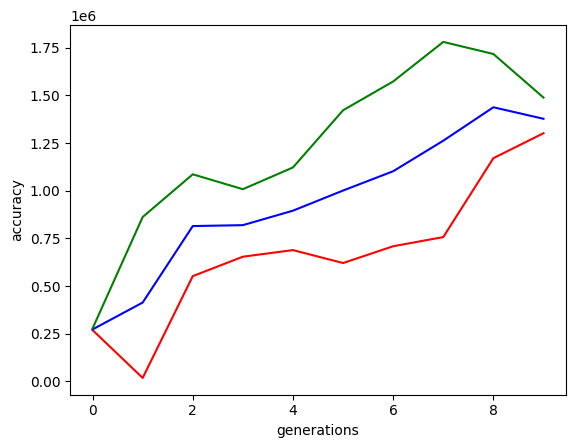

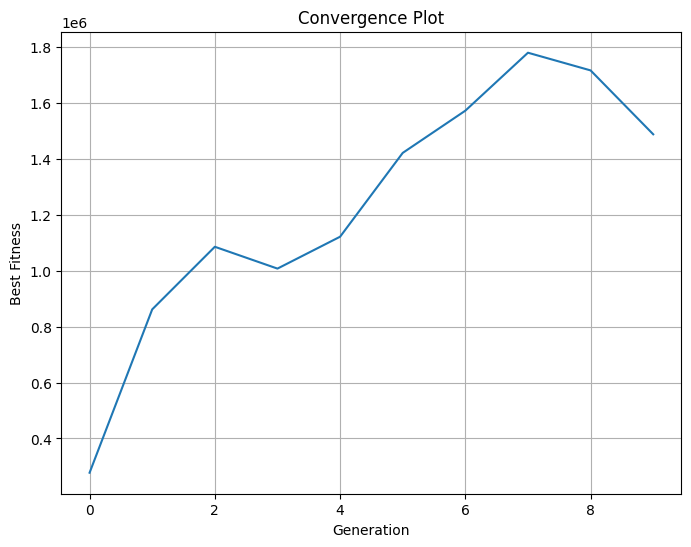

In [ ]:
if __name__ == "__main__":
    n_gen=100
    sz=500
    n_feat=2
    mutation_rate=0.4
    best_score,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    # # plot the statistics
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_gen), stats_min)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()

# GA-28


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    for i in range(n_gens):
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged at generation {i}",i)
          break
        #print("!===========!",stats_avg)
        #print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        #print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        #print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        #print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return stats_min,stats_max,stats_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


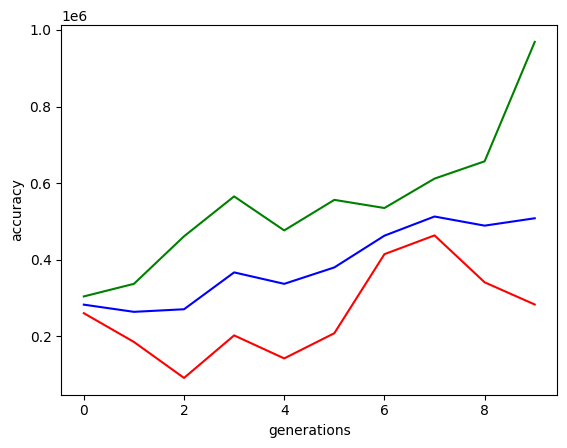

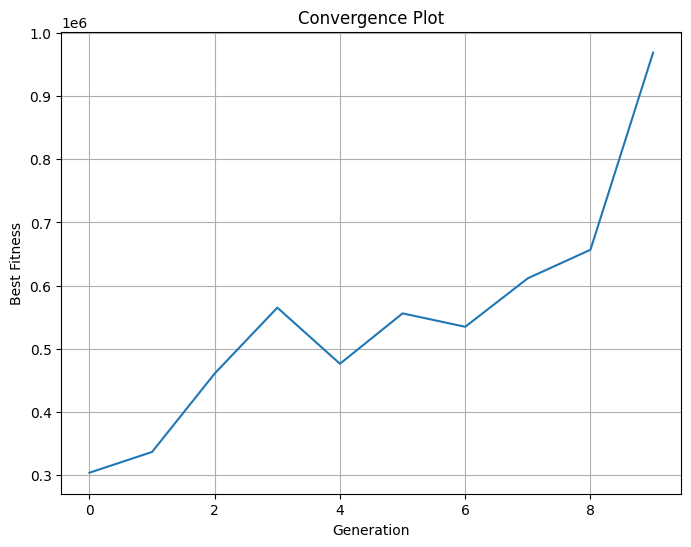

In [ ]:
if __name__ == "__main__":
    n_gen=100
    sz=500
    n_feat=2
    mutation_rate=0.4
    best_score,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    # # plot the statistics
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_gen), stats_min)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()

# GA-29



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    for i in range(n_gens):
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged at generation {i}",i)
          break
        #print("!===========!",stats_avg)
        #print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        #print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        #print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        #print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return stats_min,stats_max,stats_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


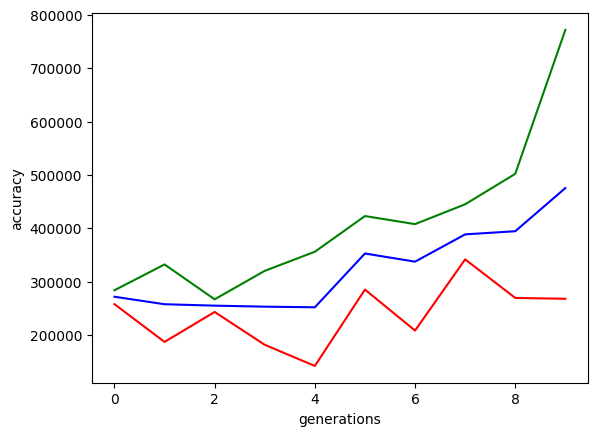

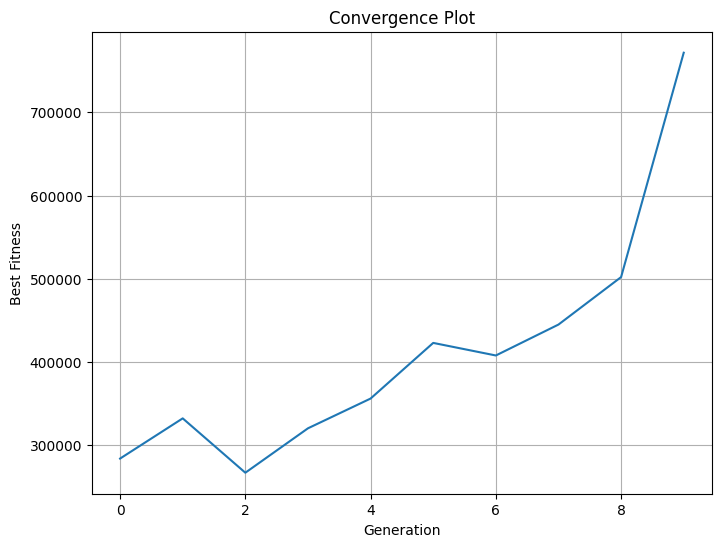

In [ ]:
if __name__ == "__main__":
    n_gen=100
    sz=500
    n_feat=2
    mutation_rate=0.4
    best_score,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    # # plot the statistics
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_gen), stats_min)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()

# GA-30



In [32]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [33]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [34]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [35]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [36]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [37]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [46]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [39]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [43]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [44]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:32] |******************************************** | (498) 

best chromosome:  [1.64708293 2.69090276]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.292
best score stanard deviation:  0.088
worst score accuracy:  0.0
worst score standard deviation:  0.0


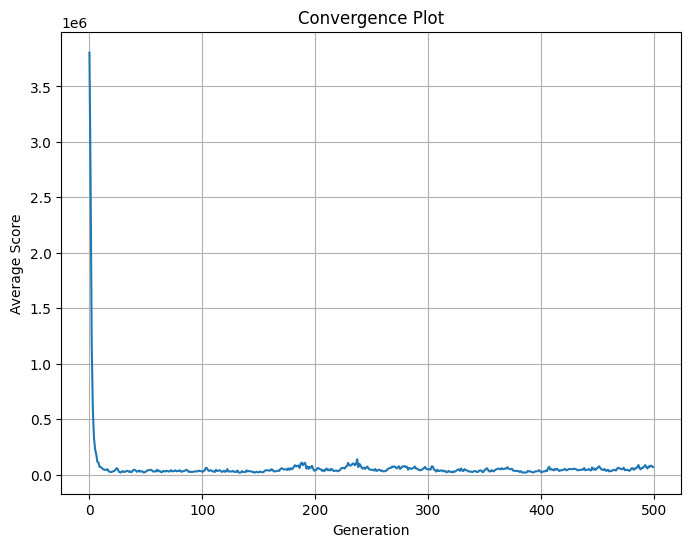

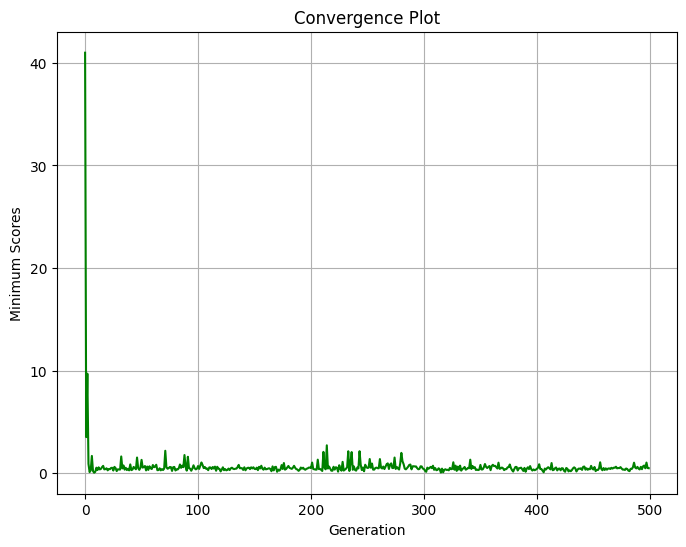

In [47]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,4)
    best_accuracy,bst_std=average_fraction(stats_min,4)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,4)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-31



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(1,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    for i in range(n_gens):
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged at generation {i}",i)
          break
        #print("!===========!",stats_avg)
        #print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        #print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        #print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        #print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return stats_min,stats_max,stats_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


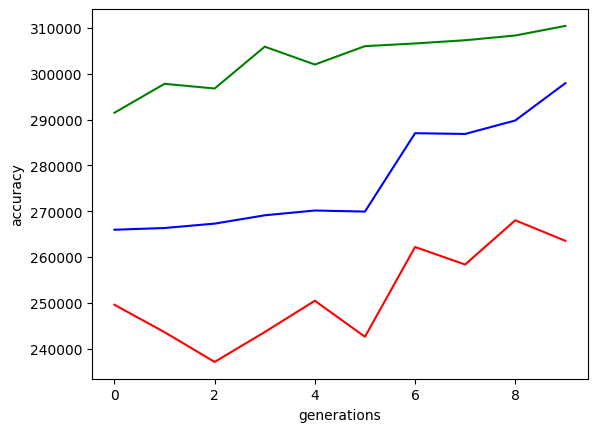

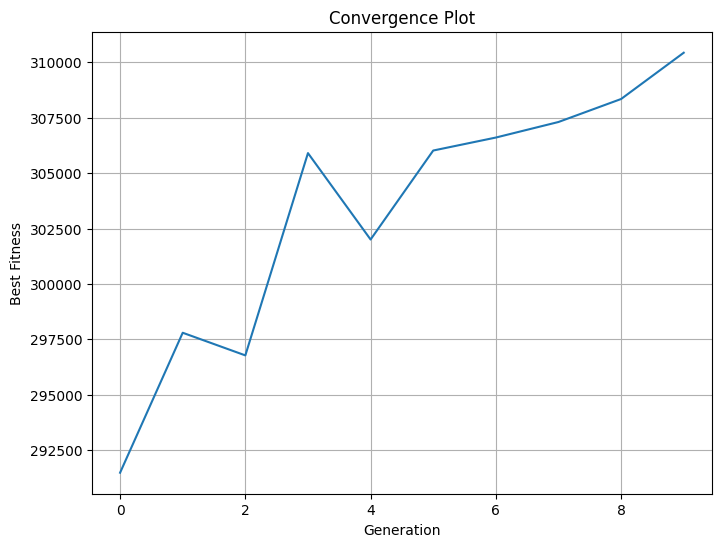

In [ ]:
if __name__ == "__main__":
    n_gen=100
    sz=500
    n_feat=2
    mutation_rate=0.4
    best_score,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    # # plot the statistics
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_gen), stats_min)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()

# GA-32



In [84]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [85]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]
  k_means_pp=KMeans(n_clusters=int(1000/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [86]:
def rosenbrock_fitness_func(population,n_feat):
    sz = len(population)
    scores=[]
    for chromosome in population:
      sum_term = 0
      for i in range(n_feat-1):
        term1 = 100 * (chromosome[i+1] - chromosome[i]**2)**2
        term2 = (1 - chromosome[i])**2
        sum_term += term1 + term2
      scores.append(sum_term)
    scoresArr,popArr=np.array(scores),np.array(population)
    indices=np.argsort(scoresArr)
    score_list=list(scoresArr[indices])
    pop_list=list(popArr[indices])
    return score_list,pop_list

In [87]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [88]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [89]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [97]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [91]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [99]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=rosenbrock_fitness_func(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [93]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:08] |******************************************** | (494) 

best chromosome:  [ 3.96775068 15.94054233]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.077
best score stanard deviation:  0.036
worst score accuracy:  0.0
worst score standard deviation:  0.0


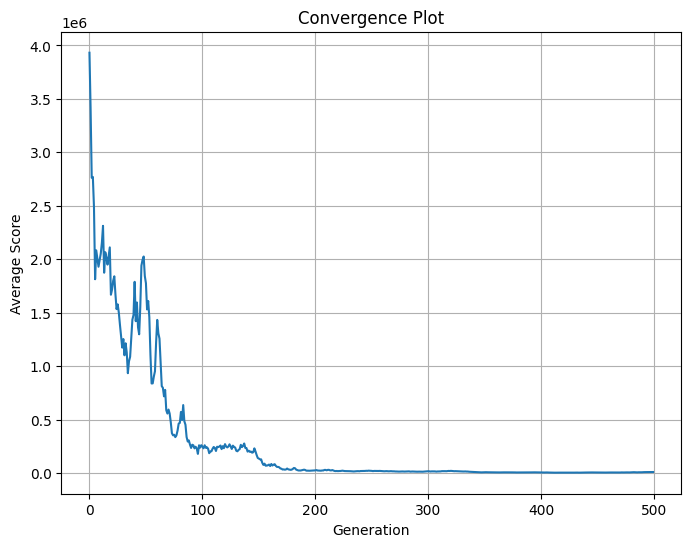

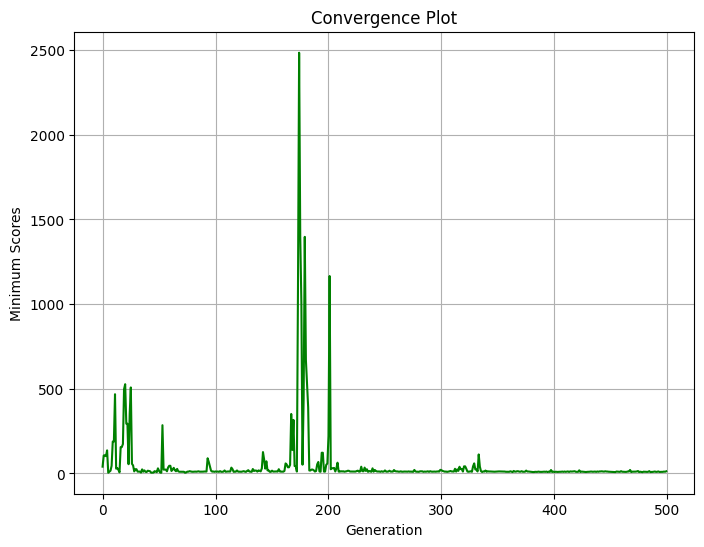

In [100]:
if __name__ == "__main__":
    n_gen=500
    sz=1000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()